In [2]:
import librosa
import librosa.display as dsp

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [3]:
path = 'C:/Users/Severin Pfister/Documents/vat-capture/data-audio/L3_right.wav'

In [4]:
y1, sr1 = librosa.load(path)
sr1, y1.shape

(22050, (1005480,))

In [6]:
int(500 / 1000 * sr1)

11025

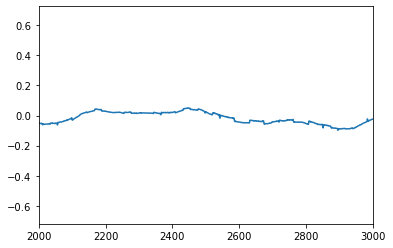

In [5]:
plt.plot(y1)
plt.xlim([2000,3000])
plt.show()

In [15]:
def func_animate(i):
    x = np.linspace(0, 4*np.pi, 1000)
    y = np.sin(2 * (x - 0.1 * i))
    
    line.set_data(x, y)
    
    return line,

ani = FuncAnimation(figure,
                    func_animate,
                    frames=10,
                    interval=50)

ani.save(r'animation.gif', fps=10)

plt.show()

NameError: name 'figure' is not defined

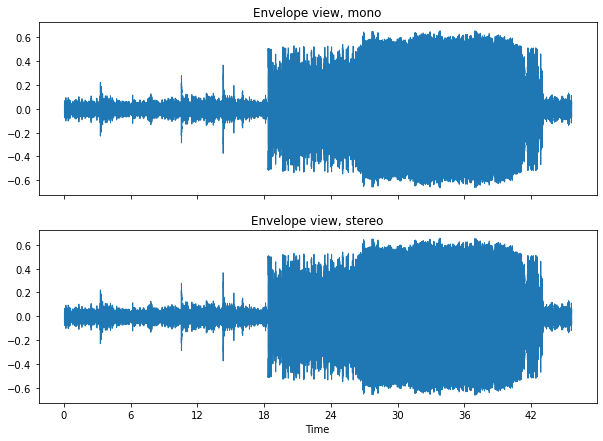

In [16]:
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(10,7))
librosa.display.waveshow(y1, sr=sr1, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()
librosa.display.waveshow(y1, sr=sr1, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

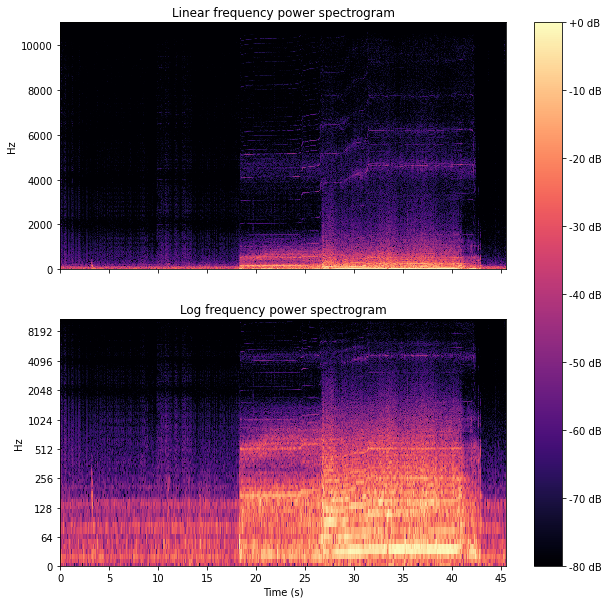

In [17]:
d = librosa.stft(y1)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
img = dsp.specshow(D, y_axis='linear', x_axis='s',sr=sr1,ax=ax[0])
ax[0].set(title='Linear frequency power spectrogram')
ax[0].label_outer()
dsp.specshow(D,y_axis='log',x_axis='s',sr=sr1,ax=ax[1])
ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')

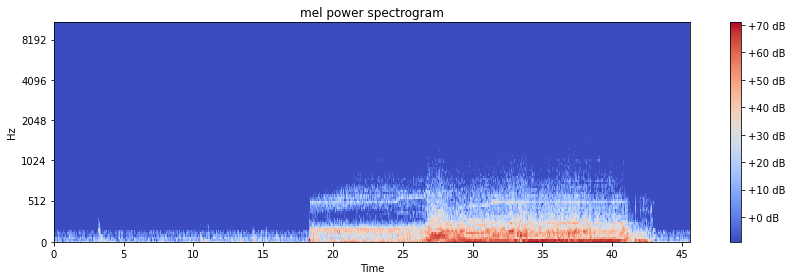

In [18]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()